# Sentiment Analysis on Twitter

<br><br>
In this algorithm, we want to do sentiment analysis to Airline in U.S. airline. As the source data that we get already have been labeled (neutral, negative, positive), we only need to do explanatory data analysis here.
<br>

As the original source says : 

<i>A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").</i><br>
<br>
Using Airline Data that has been scraped in febuary 2015, we want to see what user of the twitter says about airline in the US. 
<br><br>
**In this section we will** :
1. Do EDA on the useful columns
2. Using NLP to process user's tweet about this Airline
    - First we preprocess our data to remove unecessary symbol, stopwords, etc
    - Using wordcloud to show important word in each sentiments
    
First, we import packages

### Importing data 

In [2]:
import pandas as pd 
import numpy as np 

#import nltk for natural language toolkit
import nltk 
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
# nltk.download('stopwords')  -- We already Download it, feel free to run if you haven't
from nltk.corpus import stopwords


#import string, regex, , uniqcode     -- Used for preprocess user's tweet 
import re, string, unicodedata

#import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#import tqdm -- Used for dataframe.progress.apply(..) --> show progress bar when ... is a user defined function
from tqdm import tqdm 
tqdm.pandas()

#import beaurtiful soup     -- Used for reading our HTML text
from bs4 import BeautifulSoup

### Explanatory Data Analysis 

<br><br>
First, we read our tweet data

In [14]:
data = pd.read_csv('tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,@JetBlue's new CEO seeks the right balance to ...,NaN,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,NaN,nesi_1992,NaN,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,NaN,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.3460,United,NaN,CPoutloud,NaN,0,@united yes. We waited in line for almost an h...,NaN,2015-02-16 23:48:48 -0800,"Washington, DC",NaN
3,567592368451248130,negative,1.0,Late Flight,1.0000,United,NaN,brenduch,NaN,0,@united the we got into the gate at IAH on tim...,NaN,2015-02-16 23:52:20 -0800,NaN,Buenos Aires
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,NaN,VahidESQ,NaN,0,@SouthwestAir its cool that my bags take a bit...,NaN,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


### Data Preprocessing and Analysis

In [6]:
print("row and columns data respectively : ",data.shape)
print(data.isnull().sum())
print('\n')
print(data.info())

row and columns data respectively :  (14485, 15)
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5403
negativereason_confidence        4069
airline                             0
airline_sentiment_gold          14445
name                                0
negativereason_gold             14453
retweet_count                       0
text                                0
tweet_coord                     13478
tweet_created                       0
tweet_location                   4687
user_timezone                    4775
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14485 entries, 0 to 14484
Data columns (total 15 columns):
tweet_id                        14485 non-null int64
airline_sentiment               14485 non-null object
airline_sentiment_confidence    14485 non-null float64
negativereason                  9082 non-null object
negativereason_confidence       10416 non-

<br><br>
Looks like our data has many NaN values in them, especially in *airline_sentiment_gold*, *negativereason_gold*. We want to delete these columns but first, we want to see the not null value of those columns

In [10]:
data[['negativereason','negativereason_gold','airline_sentiment','airline_sentiment_gold']][data.airline_sentiment_gold.notnull()]

,negativereason,negativereason_gold,airline_sentiment,airline_sentiment_gold
52,NaN,NaN,neutral,neutral
323,Customer Service Issue,Customer Service Issue,negative,negative
534,Cancelled Flight,Cancelled Flight,negative,negative
678,Customer Service Issue,Cancelled Flight\nCustomer Service Issue,negative,negative
1226,Cancelled Flight,Cancelled Flight,negative,negative
2288,Lost Luggage,Lost Luggage\nDamaged Luggage,negative,negative
2674,Late Flight,Late Flight,negative,negative
3622,NaN,NaN,positive,positive
3675,NaN,NaN,positive,positive
3770,Bad Flight,Bad Flight,negative,negative


<br><br>
As you can see airline_sentiment is the same with airline_sentiment_gold and negative_reason is more or less the same with negativereason_gold. So without further ado, we drop these column.
<br><br>
Next, we want to analyze each important columns. First we want to know *number of tweet* id to see if there are any duplicate values and we want to see how many neutral,negative,positive our *airline_sentiment* is.

Number of tweet :  14485

airline_sentiment count : 
negative    9082
neutral     3069
positive    2334
Name: airline_sentiment, dtype: int64


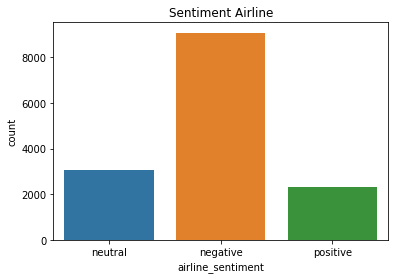

In [16]:
data=data.drop(columns=['airline_sentiment_gold','negativereason_gold'])
print("Number of tweet : ", len(data['tweet_id'].unique()))
print('\nairline_sentiment count : ')
print(data['airline_sentiment'].value_counts())
sns.countplot(data['airline_sentiment'])
plt.title('Sentiment Airline')
plt.show()

<br><br>
There is 14485 number of unique tweet, which is the same to number of rows, so there are no duplicate values. Below that, we see that **negative** sentiment is much higher, almost 3 times compared to **neutral** and almost 4 times more than **positive**. We want to know why is that from analyzing other columns and using word cloud.
<br>
<br>
Next, we analyze *airline_sentiment_confidence*. Because our data already been labeled, we see this column as how much the probability of true *airline_sentiment* is. (We deduct they are using classifier or any other method). This means that when the confidence is below 0.5, the probability of their model correctly classify *airline_sentiment* is lower than their model falsely classify sentiment. 
<br>
Before we jump to that, notice that in table below, our data mostly has more than 0.7 confidence. 

In [18]:
data[['airline_sentiment_confidence']].describe()

,airline_sentiment_confidence
count,14485.000000
mean,0.899958
std,0.162961
min,0.335000
25%,0.692300
50%,1.000000
75%,1.000000
max,1.000000


<br><br>
If we only see the data that has confidence below 0.5, we see below that mostly they have confidence between 0.3 and 0.4. Also there are 235 of them, with count of sentiment **neutral** is the highest, followed by positive and negative.Lastly we see some of data that has less than 0.4 confidence. We are not sure our about these columns so from now, we still use them as the sentiment (who is only 235 rows, and the sentiments are distributed) do not have significance impact to all data sentiment. We will compare the difference in word cloud of using and not using these column

In [20]:
unconvi=data[data['airline_sentiment_confidence']<0.4]
print('Staitistic Descriptive ')
print(unconvi.airline_sentiment_confidence.describe())
print('\nNumber of rows : ',len(unconvi))
print('\nCount of sentiment')
print(unconvi.airline_sentiment.value_counts())
unconvi.head()

count    235.000000
mean       0.354886
std        0.011958
min        0.335000
25%        0.346750
50%        0.351900
75%        0.363050
max        0.391300
Name: airline_sentiment_confidence, dtype: float64

Number of rows :  235

Count of sentiment
neutral     101
positive     71
negative     63
Name: airline_sentiment, dtype: int64


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
143,567730299912482816,negative,0.3456,Can't Tell,0.3456,United,meracross,0,@united's first-class #cockup\nhttp://t.co/oh7...,NaN,2015-02-17 09:00:26 -0800,Toronto,Pacific Time (US & Canada)
178,567733847132229632,neutral,0.3634,NaN,0.0000,Delta,thegayngler,0,@JetBlue Ok great thanks! I had a great flight...,NaN,2015-02-17 09:14:31 -0800,"NY, NY",Atlantic Time (Canada)
182,567734113088835585,neutral,0.3474,NaN,0.0000,Southwest,joepalko,0,@SouthwestAir damn weather messing up everythi...,NaN,2015-02-17 09:15:35 -0800,"Delray Beach, FL",Eastern Time (US & Canada)
200,567735239456194560,neutral,0.3686,NaN,0.0000,Delta,Vinny_Espinosa,0,"@JetBlue unfortunately no, but hoping I can ca...",NaN,2015-02-17 09:20:03 -0800,San Francisco,Pacific Time (US & Canada)
287,567745903474540545,negative,0.3573,Late Flight,0.3573,Virgin America,jonovoss,0,@VirginAmerica my flight (6000) scheduled for ...,NaN,2015-02-17 10:02:26 -0800,"Washington, DC",Atlantic Time (Canada)


<br><br>
After confidence, we now see *negativereason*. Noted that mostly, the reason of user has negative sentiment to US airline is due to *customer service issue*, *late flight*, and weirdly, *can't tell*. As for late flight sometimes it is not airline fault (weather, etc), but we see that we can deep down to look at our *Customer Service*. Are they rude? do not helping the customer at all? or are there something else? we seek to find it also using wordcloud down below

Customer Service Issue         2885
Late Flight                    1650
Can't Tell                     1176
Cancelled Flight                829
Lost Luggage                    719
Bad Flight                      575
Flight Booking Problems         523
Flight Attendant Complaints     475
longlines                       177
Damaged Luggage                  73
Name: negativereason, dtype: int64


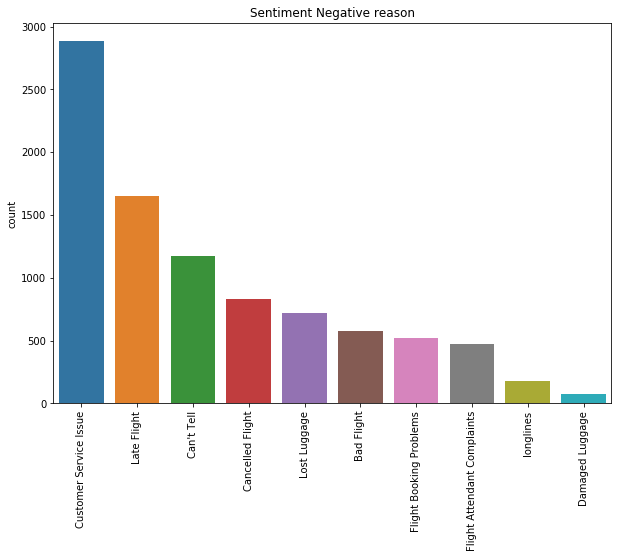

["@SouthwestAir its cool that my bags take a bit longer, dont give me baggage blue balls-turn the carousel on, tell me it's coming, then not.",
 "@united, link to current status of flights/airports? Fly BWI-EWR-MCO this morning yet can't yet tell what any problems are except see snow.",
 '@SouthwestAir you guys there? Are we on hour 2 of our phone hold at 3am bc of volume or short staffing?',
 '@united I tried 2 DM it would not go thru... not sure why',
 '@united still waiting for a reply',
 "@USAirways @AmericanAir How r u supposed to change flights when u can't get thru to reservations? #OneHourOnHold",
 "@SouthwestAir won't answer their phones #HorribleService #NeverAgain #frustrated #AnswerThePhone",
 '@USAirways reservations had me on hold for 2 hours only to hang up...smh 😕',
 '.@USAirways we have no choice but to pay another $50 to go to the airport in the hopes that we will be treated better by a rep.',
 '@USAirways I have been on hold with your Gold reservations line for OVER 

In [24]:
print(data['negativereason'].value_counts())
plt.figure(figsize=(10,7))
sns.countplot(data['negativereason'],order=data['negativereason'].value_counts().index)
plt.title('Sentiment Negative reason')
plt.xticks(rotation=90)
plt.xlabel('')
plt.show()

data.text[data.negativereason=='Customer Service Issue'].head(10).tolist()

<br><br>
Looks like, if we take the first 10 tweet text from user who has negative sentiment because of customer service, we see that mostly, airline customer service could not efficiently answering customer question and complaint. Looks like there are something wrong in airline Call service as well. Also there are case that CUstomer Service do not treat our customer nicely. Before we jump down to conclusion to fast, to further analyze it, we are using word cloud far below. 

<br><br>
Next, we want to see *negativereason_confidence* which is in our asumption is how confidence is/how right the reason of negative sentiment. There's nothing much we can do with this column other than mostly, *can't tell* negative reason has confidence the most number of confidence<0.4 compared to other reason. 

count    10416.000000
mean         0.637874
std          0.330636
min          0.000000
25%          0.360375
50%          0.670600
75%          1.000000
max          1.000000
Name: negativereason_confidence, dtype: float64



Number of rows :  1762

Count of sentiment
negative    1762
Name: airline_sentiment, dtype: int64


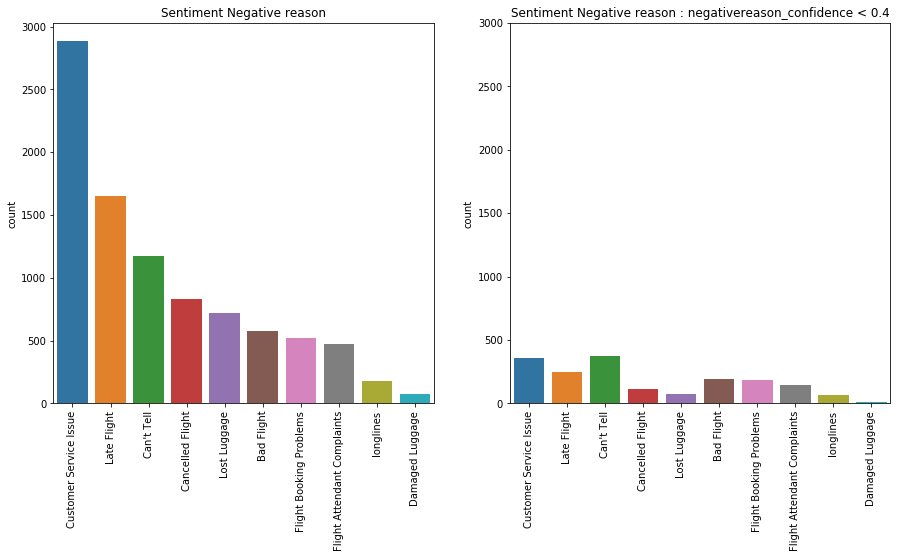

In [203]:
print(data['negativereason_confidence'].describe())
print('\n')
unconvi_neg=data[(data['negativereason_confidence']<0.4) & ( data['negativereason_confidence']!=0)]
print('\nNumber of rows : ',len(unconvi_neg))
print('\nCount of sentiment')
print(unconvi_neg.airline_sentiment.value_counts())

f=plt.figure(figsize=(15,7))

f.add_subplot(1,2,1)
sns.countplot(data['negativereason'],order=data['negativereason'].value_counts().index)
plt.title('Sentiment Negative reason')
plt.xticks(rotation=90)
plt.xlabel('')

f.add_subplot(1,2,2)
sns.countplot(unconvi_neg['negativereason'],order=data['negativereason'].value_counts().index)
plt.title('Sentiment Negative reason : negativereason_confidence < 0.4')
plt.xticks(rotation=90)
plt.ylim((0,3000))
plt.xlabel('')


plt.show()

<br><br>
Next, we want to analyze *airline* column. From the result below, Looks like **United** has the most negative sentiment toher than others airline, followed by US Airways, American and other (see graph below). US Airways, has the most negative ratio compared to other airlines. Which means that of every user who tweeted about US Airways, they have the most negative sentiment compared to other airlines. Mostly most airline has negative sentiment compared to neutral and postive sentiments.Except for Virgin America who is kinda have symetric distribution of those 3 sentiments. This could caused by there aren't much user who tweeted about Virgin America itself. 

United            3822
US Airways        2913
American          2604
Southwest         2420
Delta             2160
Virgin America     503
Name: airline, dtype: int64

Ratio Negative : 
United            0.688906
US Airways        0.776862
American          0.715822
Southwest         0.490083
Delta             0.441667
Virgin America    0.359841
Name: airline, dtype: float64


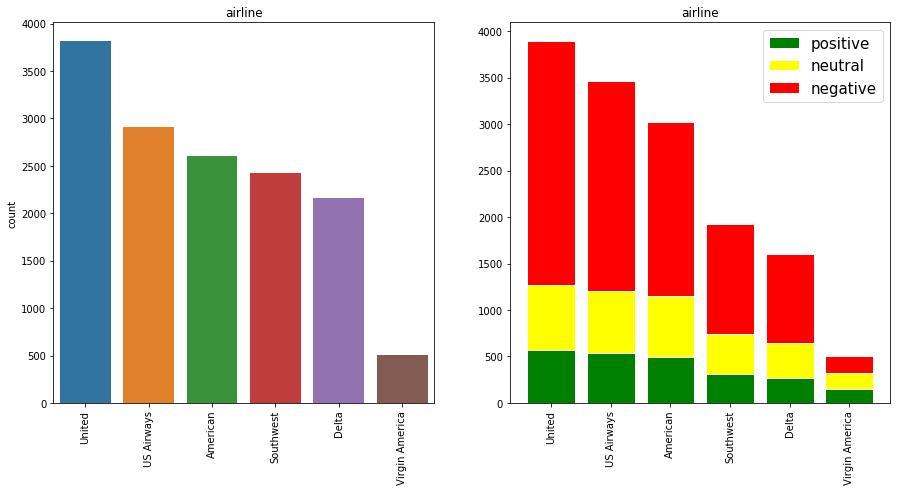

In [46]:
airline=data['airline'].value_counts()
print(airline)

f=plt.figure(figsize=(15,7))

f.add_subplot(1,2,1)
sns.countplot(data['airline'],order=data['airline'].value_counts().index)
plt.title('airline')
plt.xticks(rotation=90)
plt.xlabel('')

f.add_subplot(1,2,2)
bars1 = data[data.airline_sentiment=='positive']['airline'].value_counts()
bars2 = data[data.airline_sentiment=='neutral']['airline'].value_counts()
bars3 = data[data.airline_sentiment=='negative']['airline'].value_counts()

print('\nRatio Negative : ')
print(bars3/airline)

bar=np.add(bars1,bars2).tolist()
plt.bar(x=airline.index,height=bars1,color='green',label='positive',edgecolor='white')
plt.bar(x=airline.index,height=bars2,color='yellow',label='neutral',bottom=bars1,edgecolor='white')
plt.bar(x=airline.index,height=bars3,color='red',label='negative',bottom=bar,edgecolor='white')
plt.legend(fontsize=15)
plt.title('airline')
plt.xticks(rotation=90)
plt.xlabel('')


plt.show()


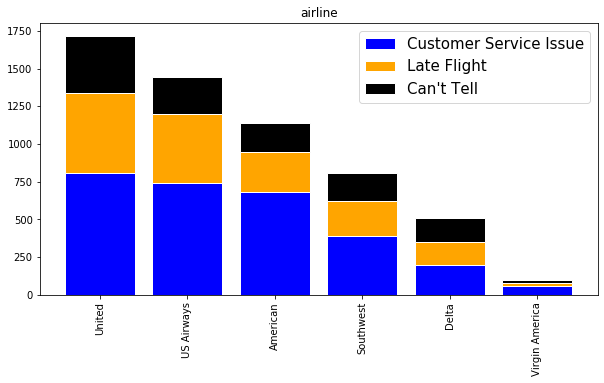

In [31]:
plt.figure(figsize=(10,5))
bars1 = data[data.negativereason=='Customer Service Issue']['airline'].value_counts()
bars2 = data[data.negativereason=='Late Flight']['airline'].value_counts()
bars3 = data[data.negativereason=="Can't Tell"]['airline'].value_counts()
bar=np.add(bars1,bars2).tolist()
plt.bar(x=airline.index,height=bars1,color='blue',label='Customer Service Issue',edgecolor='white')
plt.bar(x=airline.index,height=bars2,color='orange',label='Late Flight',bottom=bars1,edgecolor='white')
plt.bar(x=airline.index,height=bars3,color='black',label="Can't Tell",bottom=bar,edgecolor='white')
plt.legend(fontsize=15)
plt.title('airline')
plt.xticks(rotation=90)
plt.xlabel('')


plt.show()


<br><br>
As for reason of negative, using those 3, we see that stil, CUstomer Service Issue is the most common reason of negative sentiment in these airlines.
<br><br>
Next, we analyze '*name* that is the user name of twitter. There are 7701 unique user, means that there are user who tweet about airline more than one (which is make sense). Username **JetBlueNews** has the most number of tweets compared to others that is kbosspotter, *_mhertz* and others. Now see the **JetBlueNews** data. Looks like this user is used to be observation from our sentiment analysis, whose sentiment ranging from neutral to positive and one negative. We have assumption that this user what News Account, whose in our opinion can not we used to see twitter's users opinion about airline. 

In [33]:
print('User Name descriptive :')
print(data['name'].describe())

print('\nUser Name count : ')
print(data.name.value_counts().head())

print('\nJetBlueNews')
print(data.airline_sentiment[data.name=='JetBlueNews'].value_counts())
data[data.name=='JetBlueNews'].head()

User Name descriptive :
count           14485
unique           7701
top       JetBlueNews
freq               63
Name: name, dtype: object

User Name count : 
JetBlueNews    63
kbosspotter    32
_mhertz        29
otisday        28
throthra       27
Name: name, dtype: int64

JetBlueNews
neutral     57
positive     5
negative     1
Name: airline_sentiment, dtype: int64


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0000,NaN,NaN,Delta,JetBlueNews,0,@JetBlue's new CEO seeks the right balance to ...,NaN,2015-02-16 23:36:05 -0800,USA,Sydney
48,567716378681933825,neutral,1.0000,NaN,NaN,Delta,JetBlueNews,0,"@JetBlue CEO weighs profits, flyers - @Chronic...",NaN,2015-02-17 08:05:06 -0800,USA,Sydney
79,567724178317402112,positive,0.6429,NaN,NaN,Delta,JetBlueNews,0,@JetBlue to offer service from Daytona Beach t...,NaN,2015-02-17 08:36:06 -0800,USA,Sydney
291,567746576626356225,neutral,1.0000,NaN,NaN,Delta,JetBlueNews,0,@JetBlue CEO battles to please Wall St and fly...,NaN,2015-02-17 10:05:06 -0800,USA,Sydney
348,567754367860633600,neutral,1.0000,NaN,NaN,Delta,JetBlueNews,0,@JetBlue's new CEO seeks the right balance to ...,NaN,2015-02-17 10:36:04 -0800,USA,Sydney


In [34]:
print(data.text[data.name=='JetBlueNews'].head(10).tolist())
print('\n')
print(data.text[data.name=='kbosspotter'].head(10).tolist())

["@JetBlue's new CEO seeks the right balance to please passengers and Wall ... - Greenfield Daily Reporter http://t.co/LM3opxkxch", '@JetBlue CEO weighs profits, flyers - @ChronicleHerald (registration) http://t.co/9vKj9S7jrM', '@JetBlue to offer service from Daytona Beach to New York - Albany Business Review http://t.co/dUhBJ41jHx', '@JetBlue CEO battles to please Wall St and flyers - from @NZherald http://t.co/Q4Amiw7FSw', "@JetBlue's new CEO seeks the right balance to please passengers and Wall ... - Weyburn Review http://t.co/rtQyjCvTQ3", "@JetBlue's new CEO seeks the right balance to please passengers and Wall ... - Times Colonist http://t.co/NzDXRvszWv", '@JetBlue Airways Short Interest Down 3.5% in January (JBLU) - sleekmoney http://t.co/znsUjP86Bv', "@JetBlue's new CEO Robin Hayes battles to appease passengers and Wall Street - Business In Savannah http://t.co/KKAY8XaPs1", '@JetBlue Airways Adds New Charter #Flight to Cuba - #Travel Wires (blog) http://t.co/Swb1gR57Cc', '@JetBl

<br><br>
Compared to **kbosspotter**, **JetBlueNews** seems only tweeted about news of JetBlue (Who is airplane companies who we don't know why their tweeted is associated with airline like US Airways and others) and because of this, we have to drop this data as they are irrelevant to customer of airline in the US. Because this user has 63 observation in our data, we do not repeat what previously has we done in our EDA and we step forward instead. 

In [35]:
data=data[data.name!='JetBlueNews']

In [36]:
print(data[['tweet_location','user_timezone']].describe())
data[data['retweet_count']>0].sort_values('retweet_count',ascending=False).head()

       tweet_location               user_timezone
count            9735                        9647
unique           3081                          85
top        Boston, MA  Eastern Time (US & Canada)
freq              156                        3720


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1290,567897883875217408,negative,1.0000,Late Flight,1.0000,US Airways,OBJ_3,44,@USAirways 5 hr flight delay and a delay when ...,NaN,2015-02-17 20:06:21 -0800,NaN,Eastern Time (US & Canada)
1338,567909106553483264,negative,1.0000,Can't Tell,0.6608,US Airways,OBJ_3,32,@USAirways of course never again tho . Thanks ...,NaN,2015-02-17 20:50:56 -0800,NaN,Eastern Time (US & Canada)
11441,569927288751587328,negative,1.0000,Can't Tell,1.0000,Delta,TatianaKing,31,STOP. USING.THIS.WORD. IF. YOU'RE. A. COMPANY....,NaN,2015-02-23 10:30:29 -0800,"New York, NY",NaN
8033,569584057270575105,neutral,0.6593,NaN,NaN,US Airways,airliners2,28,@USAirways with this livery back in the day. h...,NaN,2015-02-22 11:46:36 -0800,Airports Around The World,Eastern Time (US & Canada)
4871,568869594531651584,positive,1.0000,NaN,NaN,Southwest,seattlefordguy,22,@SouthwestAir beautiful day in Seattle! http:/...,NaN,2015-02-20 12:27:35 -0800,"Bellevue, WA",Hawaii


<br><br>
Last, in this section we want to analyze *tweet_location* and *user_timezone*. Looks like there are duplicat and unnormalized value from these column. For example there are user who is from New York, NY and there are other user that is from New York. If we ignore these, from result below, **Boston, MA** seems the most popular location of users, followed by **New York, NY** with the difference between them only 1 user, and followed by **Washington, DC** and others. In *user_timezone*, **Eastern Time** seems like the most popular one. 

In [37]:
loc=data[['tweet_location','user_timezone']]
print(loc.tweet_location.value_counts().head())
print(loc.user_timezone.value_counts().head())

Boston, MA        156
New York, NY      155
Washington, DC    145
New York          125
Chicago           103
Name: tweet_location, dtype: int64
Eastern Time (US & Canada)    3720
Central Time (US & Canada)    1900
Pacific Time (US & Canada)    1196
Quito                          724
Atlantic Time (Canada)         494
Name: user_timezone, dtype: int64


In [39]:

print('Percent of negative in Boston, MA',
      len(data[(data.tweet_location=='Boston, MA')&(data.airline_sentiment=='negative')])/156*100,"%")
print('Percent of negative in New York, NY',
      len(data[(data.tweet_location=='New York, NY')&(data.airline_sentiment=='negative')])/155*100,"%")
print('Percent of negative in Washington, DC',
      len(data[(data.tweet_location=='Washington, DC')&(data.airline_sentiment=='negative')])/145*100,"%")
print('Percent of negative in New York',
      len(data[(data.tweet_location=='New York')&(data.airline_sentiment=='negative')])/125*100,"%")
print('\n')
print('Percent of negative in Eastern Time',
      len(data[(data.user_timezone=='Eastern Time (US & Canada)')&(data.airline_sentiment=='negative')])/3720*100,"%")
print('Percent of negative in Central Time',
      len(data[(data.user_timezone=='Central Time (US & Canada)')&(data.airline_sentiment=='negative')])/1900*100,"%")
print('Percent of negative in Pacific Time',
      len(data[(data.user_timezone=='Pacific Time (US & Canada)')&(data.airline_sentiment=='negative')])/1196*100,"%")


Percent of negative in Boston, MA 65.38461538461539 %
Percent of negative in New York, NY 59.354838709677416 %
Percent of negative in Washington, DC 73.10344827586206 %
Percent of negative in New York 68.8 %


Percent of negative in Eastern Time 61.854838709677416 %
Percent of negative in Central Time 61.631578947368425 %
Percent of negative in Pacific Time 59.280936454849495 %


From these percent ratio of negative of each user location, we find that Washington DC has the most negative ratio compared to other sentiment in our data, followed by New York, Boston MA. If we see timezone, these 3 timezone kinda similiar with Pacific Time has the lowest negative ratio percent. 

<br><br><br>
**Conclusion , Part 1**
From this part, we see that mostly, users sentiment about US airline is negative. We see that most of the reason is because Bad Customer Service followed by Late Flight, who is the case for each airlines. If we looked at each airlines, we see that US AIRWAYS has the most negative ratio sentiment. United has the most tweeted about compared to other airlines. 
<br>
If we looked at our data, we see that there are few error and confusion. For example *airline_sentiment_confidence*, news account like JetBlueNews. It make us questions what is the determination factor of each user's airline brand, and sentiment. But from now, we ignore these questions and deep further to Tweet Analysis, using Word CLoud. 

### Tweet Analysis

<br><br>
We want to analyze *text* column to see prople general opinion about airlines. ALso we want to see people general opinion about 2 major airlines, which is United, and US Airways. Last, we want to see people general opinion about negativereason Customer Service Issue, and Late Flight.
<br><br>
First, for *airline_sentiment*. We take only *text* and *airline_sentiment* columns. 

In [48]:
df=data[['text','airline_sentiment']]
df.head()

,text,airline_sentiment
1,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,negative
2,@united yes. We waited in line for almost an h...,negative
3,@united the we got into the gate at IAH on tim...,negative
4,@SouthwestAir its cool that my bags take a bit...,negative
5,@united and don't hope for me having a nicer f...,negative


<br><br>
As you can see there are still many text that uses symbols emoticon, stopwords and misspelled words. First, we clean text data

In [49]:
#cleansing 
def preprocessing(text):
    def strip_html(text):
        soup = BeautifulSoup(text, "html.parser")
        return soup.get_text()
    def remove_between_square_brackets(text):
        return re.sub('-\[[^]]*\]', '', text)
    def denoise_text(text):
        text = strip_html(text)
        text = remove_between_square_brackets(text)
        return text
    def remove_punctuation(text):
        return re.sub(r'[^\w\s]', '', text)
    def remove_non_ascii(text):
        return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_punctuation(text)
    text = remove_non_ascii(text)
    
    return text.lower()

<br><br>
Using function above, we will remove unecessary symbols, punctuation, and non ascii text. non ascii means *American Standard Code for Information Interchange* (for more explanation [clickhere](https://en.wikipedia.org/wiki/ASCII). 
<br>
After we define our preprocessing function, using tqdm we use dataframe.progress_apply to tidy our text data. Using this method we can see the progress bar of our function.

In [50]:
df['text'] = df['text'].progress_apply(preprocessing)
df.head()

100%|██████████████████████████████████████████████████████████████████████████| 14422/14422 [00:11<00:00, 1258.03it/s]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,text,airline_sentiment
1,jetblue is really getting on my nerves nothappy,negative
2,united yes we waited in line for almost an hou...,negative
3,united the we got into the gate at iah on time...,negative
4,southwestair its cool that my bags take a bit ...,negative
5,united and dont hope for me having a nicer fli...,negative


In [55]:
df.text.head().tolist()

['jetblue is really getting on my nerves   nothappy',
 'united yes we waited in line for almost an hour to do so some passengers just left not wanting to wait past 1am',
 'united the we got into the gate at iah on time and have given our seats and closed the flight if you know people is arriving have to wait',
 'southwestair its cool that my bags take a bit longer dont give me baggage blue ballsturn the carousel on tell me its coming then not',
 'united and dont hope for me having a nicer flight some other time try to do things right you sold me those tickets with that connetion']

<br><br>
As you can see above, we remove unecessary symbols and also lowercase each text. But there are still horizontal whitespace. As we use word cloud, we ignore those and goes to the next step, removing stopwords like *the,a,an,is,(whitespace)* etc.

In [57]:
#stopword 
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.text.head().tolist()



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


['jetblue really getting nerves nothappy',
 'united yes waited line almost hour passengers left wanting wait past 1am',
 'united got gate iah time given seats closed flight know people arriving wait',
 'southwestair cool bags take bit longer dont give baggage blue ballsturn carousel tell coming',
 'united dont hope nicer flight time try things right sold tickets connetion']

<br><br>Our text become more and more tidy. Next we do lemtization which is turned nonbased verb into base verb. For example, Drove-->Drive etc

In [74]:
a=[]
for sentence in df.text:
    words = nltk.word_tokenize(sentence)
    a.append(words)
a[0:2]

[['jetblue', 'really', 'getting', 'nerve', 'nothappy'],
 ['united',
  'yes',
  'waited',
  'line',
  'almost',
  'hour',
  'passenger',
  'left',
  'wanting',
  'wait',
  'past',
  '1am']]

In [76]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word, pos):
    word=lemmatizer.lemmatize(word, pos)
    return word
lemmatizer = WordNetLemmatizer()

In [77]:
b=[]
for row in a:
    c=[]
    for string in row:
        c.append(compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word = string, pos = wordnet.VERB))
    b.append(c)
b[0:2]

[['jetblue', 'really', 'get', 'nerve', 'nothappy'],
 ['unite',
  'yes',
  'wait',
  'line',
  'almost',
  'hour',
  'passenger',
  'leave',
  'want',
  'wait',
  'past',
  '1am']]

<br><br>
Now we only needed to join each row on this list in one column, then input it to the original df.text

In [81]:
c=[]
for row in b:
    c.append(" ".join(row))
c[0:2]
df['text']=c
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,text,airline_sentiment
1,jetblue really get nerve nothappy,negative
2,unite yes wait line almost hour passenger leav...,negative
3,unite get gate iah time give seat close flight...,negative
4,southwestair cool bag take bite longer dont gi...,negative
5,unite dont hope nicer flight time try thing ri...,negative


<br><br>
Now, our data is tidy and contains all base verbs. Now we use Wordcloud. First we divide our data into 3 sentiment

In [88]:
#define happy and not happy 
happy = df.loc[df['airline_sentiment'] == "positive"]
not_happy  = df.loc[df['airline_sentiment'] == "negative"]
neutral  = df.loc[df['airline_sentiment'] == "neutral"]

<br><br>
Then, we join each row in our data into one big text, after that we ready to use wordcloud

In [89]:
#merge all the happy comments into one paragraph
all_description_happy = "".join(happy.text.values)
all_description_not_happy = "".join(not_happy.text.values)

all_description_neutral = "".join(neutral.text.values)

In [90]:
#text = happy.Description
#make a wordcloud 
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

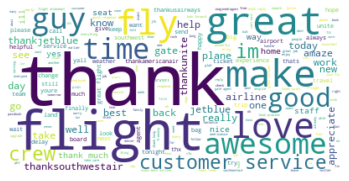

In [91]:
#happy 
create_word_cloud(all_description_happy)

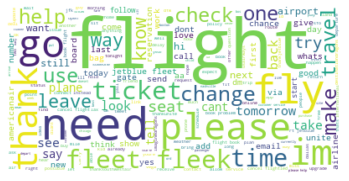

In [92]:
#neutral 
create_word_cloud(all_description_neutral)

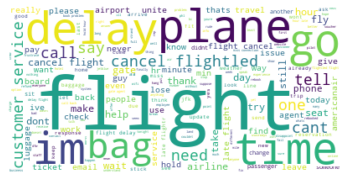

In [93]:
#negative 
create_word_cloud(all_description_not_happy)

<br><br>
It gets a little bit confusing, but we can see that in overal, user with specific sentiment has tweets containing all these verbs. FOr example in positive, people often use verb Thank, love, great. Also, there are customer service in the bottom, which could means either they are in love with airlines's customer service or they are have comment about customer service, But they are still have positive sentiment. In neutral, more or less is the same.<br>
In negative sentiment, we see that most tweet contains verb time, flight, cancel, delay, customer service, call ,and many more. This strengthen our finding in before section that is most negative sentiment user is caused by customer service (service, and call service) and about their flight (eiither canceled, delay, and etc).<br><br>
Now we want to analyze airlines United, and US Airways and user general opinion about them

In [102]:
df2=pd.DataFrame()
df2['text']=df['text']
df2['airline']=data['airline']
df2=df2[(df2.airline=='United')|(df2.airline=='US Airways')]

united=df2[df2.airline=='United']
us=df2[df2.airline=='US Airways']

#merge all the happy comments into one paragraph
united = "".join(united.text.values)
us = "".join(us.text.values)


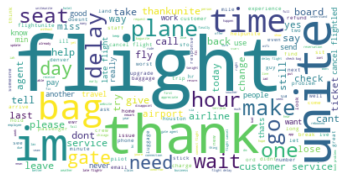

In [103]:
#United
create_word_cloud(united)

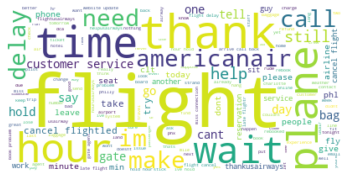

In [104]:
create_word_cloud(us)

<br><br>
Using these, we find that mostly the problem of these airlines is either they have to wait in hour or more our there are some problems with the flight.

In [118]:
df3=pd.DataFrame()
df3['text']=df['text']
df3['negativereason']=data['negativereason']
df3=df3[(df3.negativereason=='Customer Service Issue')|(df3.negativereason=='Late Flight')]

CS=df3[df3.negativereason=='Customer Service Issue']
LF=df3[df3.negativereason=='Late Flight']

#merge all the happy comments into one paragraph
CS = "".join(CS.text.values)
LF = "".join(LF.text.values)


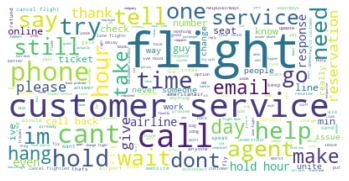

In [119]:
create_word_cloud(CS)

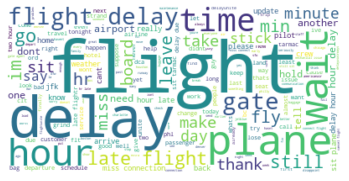

In [120]:
create_word_cloud(LF)

<br><br>
From here, we get that in Customer Service, there are problem in email, phone, either they do not reply or asking customer to hold their phones. In late flight, there are delay overal that make the plane late to come

## CREATED BY : Andreas M